<a href="https://colab.research.google.com/github/coder100coder-wsu/AI_ML/blob/main/v1_disease_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
%matplotlib inline

In [ ]:
train_data_path = "/content/drive/MyDrive/disease pred/Training[1].csv"
test_data_path = "/content/drive/MyDrive/disease pred/Testing[1].csv"

In [ ]:
df_1 = pd.read_csv(train_data_path)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
df_1.head(2) # get first 2 rows

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df_1.describe(include='all')

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
df_1.info(verbose= True, buf=None, max_cols=None, memory_usage=None, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    itching                         4920 non-null   int64  
 1    skin_rash                       4920 non-null   int64  
 2    nodal_skin_eruptions            4920 non-null   int64  
 3    continuous_sneezing             4920 non-null   int64  
 4    shivering                       4920 non-null   int64  
 5    chills                          4920 non-null   int64  
 6    joint_pain                      4920 non-null   int64  
 7    stomach_pain                    4920 non-null   int64  
 8    acidity                         4920 non-null   int64  
 9    ulcers_on_tongue                4920 non-null   int64  
 10   muscle_wasting                  4920 non-null   int64  
 11   vomiting                        4920 non-null   int64  
 12   burning_micturitio

In [ ]:
df_1.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [ ]:
df_1.shape # get dimensions, qty of rows, columns

(4920, 134)

In [ ]:
df_1['Unnamed: 133'].unique()

array([nan])

In [ ]:
# Drop col; df_1['Unnamed: 133']
df_1.drop('Unnamed: 133', axis=1, inplace=True)

In [ ]:
df_1.shape

(4920, 133)

In [ ]:
# only 133 columns now; 1-less than previous 134. drop column successful.

In [ ]:
# df_1.value_counts(dropna=False)
# too much output, do not use on ALL cols, shortlist columns then use value_counts

In [ ]:
# # Reading the train.csv by removing the
# # last column since it's an empty column
# DATA_PATH = "dataset/Training.csv"
# data = pd.read_csv(DATA_PATH).dropna(axis = 1)


## is dataset balanced ?

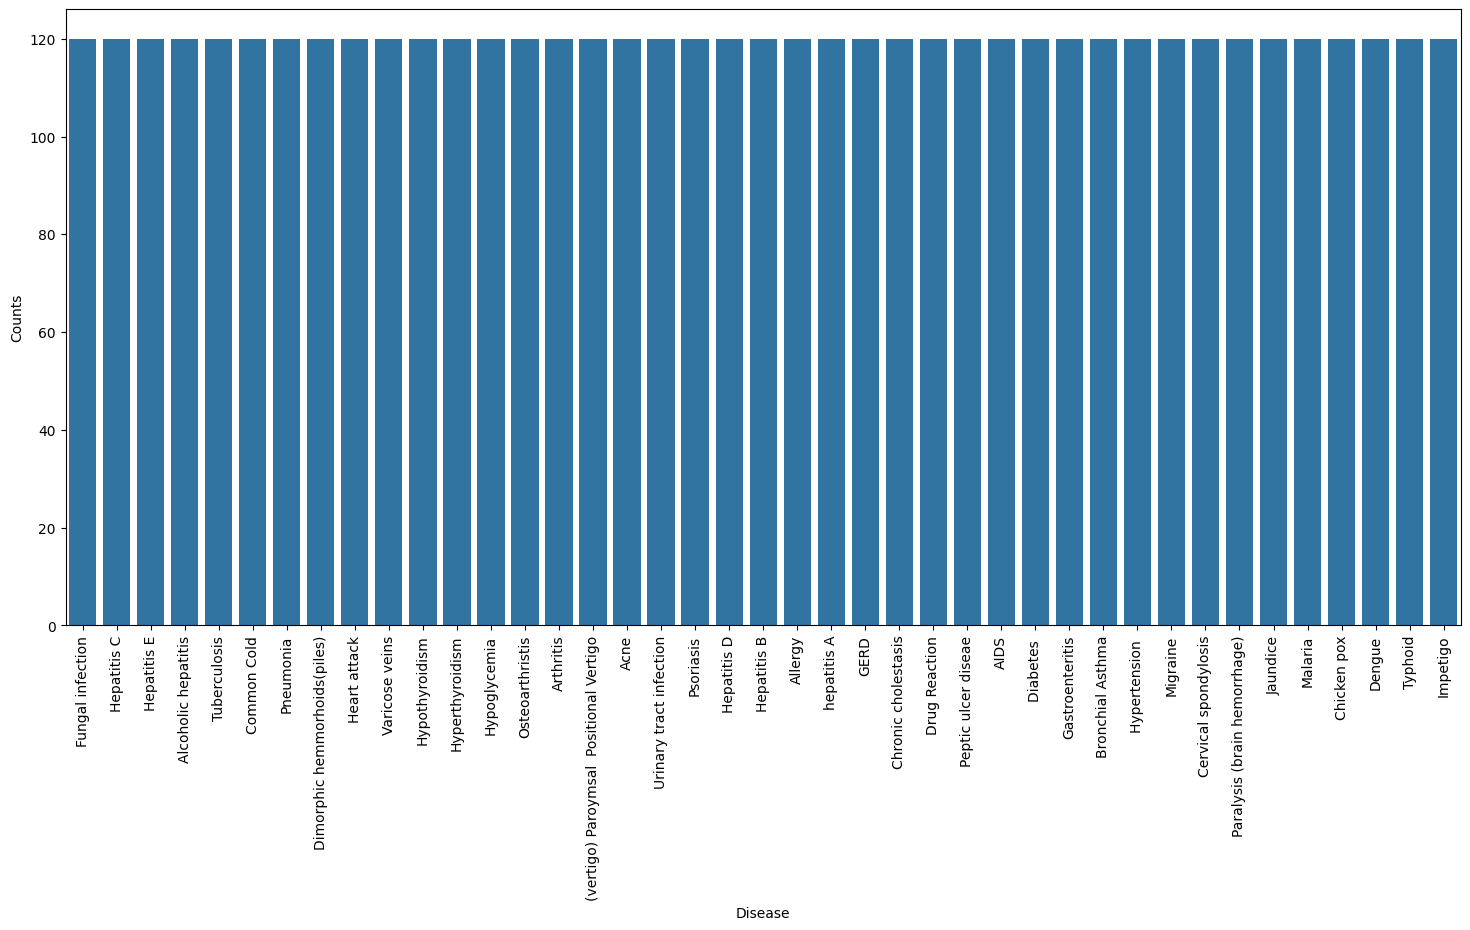

In [ ]:
# Checking whether the dataset is balanced or not
disease_counts = df_1["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))

sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

As seen from above plot, there are 120 rows/observations for each disease.

In [ ]:
df_1["prognosis"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4920 entries, 0 to 4919
Series name: prognosis
Non-Null Count  Dtype 
--------------  ----- 
4920 non-null   object
dtypes: object(1)
memory usage: 38.6+ KB


Target variable, col "prognosis", is of datatype "object".
That is Target variable has multiple classess, each representing a disease.
Disease name itself is a label.
Need to normalize labels.
So use label encoder.

In [ ]:
df_1["prognosis"].unique()
# Gives/returns labels that are unique.
# We can think of this operations as "remove duplicates".

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
qty_of_target_classes = len(df_1["prognosis"].unique())
print("qty_of_target_classes= ", qty_of_target_classes)
# Gives/returns how many classes in target var.

qty_of_target_classes=  41


In [ ]:
# Encoding the Target variable, col "prognosis" using LabelEncoder transformer.
# Encode target labels with value between 0 and n_classes-1; not the input X.
# LabelEncoder can be used to normalize labels.
# This is a supervised learning ML effort.
encoder = LabelEncoder()
df_1["prognosis"] = encoder.fit_transform(df_1["prognosis"])


In [ ]:
# df_1["prognosis"].value_counts().sort_index()

## Split into train and test datasets

In [ ]:
# predictor vars
# all rows. all cols except target var col.
X = df_1.iloc[:,:-1]
# df.iloc => Purely integer-location based indexing for selection by position.

# target var col to be predicted
y = df_1.iloc[:, -1]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


## Model Building

Supervised machine learning.
- Target variable "prognosis", as disease names, which are known labels/target var values,
-- so supervised;
- which is multi-class, as different disease names;
- was encoded previously, by LabelEncoder;
-- so use classification algo.

Use k-fold cross-validation--
- to increase "generalization" of model (model performs better on unseen data/ general data/ real-world data) when compared to model trained without k-fold cross-validation.
- to detect over-fitting (model works great on training data, but works really bad on unseen data, because model "overfits" to training data)

In [ ]:
# Create new function for getting/returning scoring metric for k-fold cross validation
def cv_score_return(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
Accuracy classification score.

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. [ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html ]

In [ ]:
# Initializing Models
models_dict = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

Support Vector Machines Classifier:
- given a labeled training data, the algorithm tries to find an optimal hyperplane that accurately separates the samples into different categories in hyperspace.



Gaussian Naive Bayes Classifier:
- probabilistic machine learning algorithm that internally uses Bayes Theorem to classify the data points.

Random Forest Classifier:
- ensemble learning-based supervised machine learning classification algorithm that internally uses multiple decision trees to make the classification.

In [ ]:
# Get cross validation score for each of the models
for model_name_key in models_dict:
  # for key in dict
	model_name_value = models_dict[model_name_key]
  # extract value from key:value pair in dict
	scores = cross_val_score(model_name_value,
                          X,
                          y,
                          cv = 10,
    # cv=int, to specify the number of folds in a (Stratified)KFold,
    # For int input, if the estimator is a classifier (yes, in this use-case)
    # and y is either binary or multiclass, (multi-class, in this use-case)
    # THEN, StratifiedKFold is used.
                          n_jobs = -1, # -1 means using all processors
                          scoring = cv_score_return
                          )
	print("=="*30)
	print(model_name_key)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', error_score=nan)
Evaluate a score by cross-validation.
[ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html ].

To build a more robust model, we can combine the predictions of all three models. We can take the mode (most frequently occuring value) of the models' predicted class.

Since there are 3-qty. total models here in this use-case; we can think of the "mode" as 2 out of 3 voting; as 2 would be the "mode (most frequently occuring value)".

3-qty-models < 41-qty_of_target_classes.

## SVM

SVM = Support Vector Machines Classifier

In [ ]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
# use boolean mask
df_bool = (y_pred == 0)
print(df_bool.sum().sum())
# alternative, filter array, then get length
# print(len(y_pred[y_pred == 0]))
# using len because sum of zeroes is zero

32


In [ ]:
# use boolean mask
df_bool = (y_test == 0)
# compare with known labels
print(df_bool.value_counts())
print(df_bool.sum())

# alternative, filter array, then get length
# print(len(y_test[y_test == 0]))

prognosis
False    952
True      32
Name: count, dtype: int64
32


In [ ]:
print("Accuracy on training data by SVM Classifier = ",
      accuracy_score(y_train, svm_model.predict(X_train))*100)
print("Accuracy on test data by SVM Classifier = ",
      accuracy_score(y_test, y_pred)*100)


Accuracy on training data by SVM Classifier =  100.0
Accuracy on test data by SVM Classifier =  100.0


sklearn.metrics.classification_report

[ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report]

In [ ]:
target_class_names = ['class '+ str(i) for i in range(0,41)]
# print(target_names)

In [ ]:
print("Classification Report on training data by SVM Classifier = \n",
      classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names= target_class_names))

Classification Report on training data by SVM Classifier = 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        32
     class 1       1.00      1.00      1.00        21
     class 2       1.00      1.00      1.00        20
     class 3       1.00      1.00      1.00        23
     class 4       1.00      1.00      1.00        24
     class 5       1.00      1.00      1.00        29
     class 6       1.00      1.00      1.00        32
     class 7       1.00      1.00      1.00        24
     class 8       1.00      1.00      1.00        29
     class 9       1.00      1.00      1.00        24
    class 10       1.00      1.00      1.00        25
    class 11       1.00      1.00      1.00        17
    class 12       1.00      1.00      1.00        21
    class 13       1.00      1.00      1.00        27
    class 14       1.00      1.00      1.00        20
    class 15       1.00      1.00      1.00        25
    class 16       1

In [ ]:
cf_matrix = confusion_matrix(y_true= y_test,
                             y_pred= y_pred)
# y_true - Ground truth (correct) target values.
# y_pred - Estimated targets as returned by a classifier.
# [ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html]

In [ ]:
# print("cf_matrix= \n", cf_matrix)
# print("\ncf_matrix.shape=", cf_matrix.shape)

For multi-class use-case; the confusion matrix is a (n x n) table, where n is the qty. of classes.

Diagonal elements of the confusion matrix represent correct predictions.
- Correct predictions means (y_pred) same class as (y_true).


Off-diagonal elements of the confusion matrix represent not-correct predictions.
- Not-correct predictions means (y_pred) is NOT the same class as (y_true).
- We can think of these as combination of False Positives (FP) and False Negatives (FN) in the binary (2-class, not-multi-class) use-case, but for each combination of classes

Thus, in case of multi-class confusion matrix,
- qty. or total of correct predictions is the sum of all diagonal elements.
- qty. or total of not-correct predictions is the sum of all off-diagonal elements.

In current use-case; the confusion matrix is a (41 x 41).

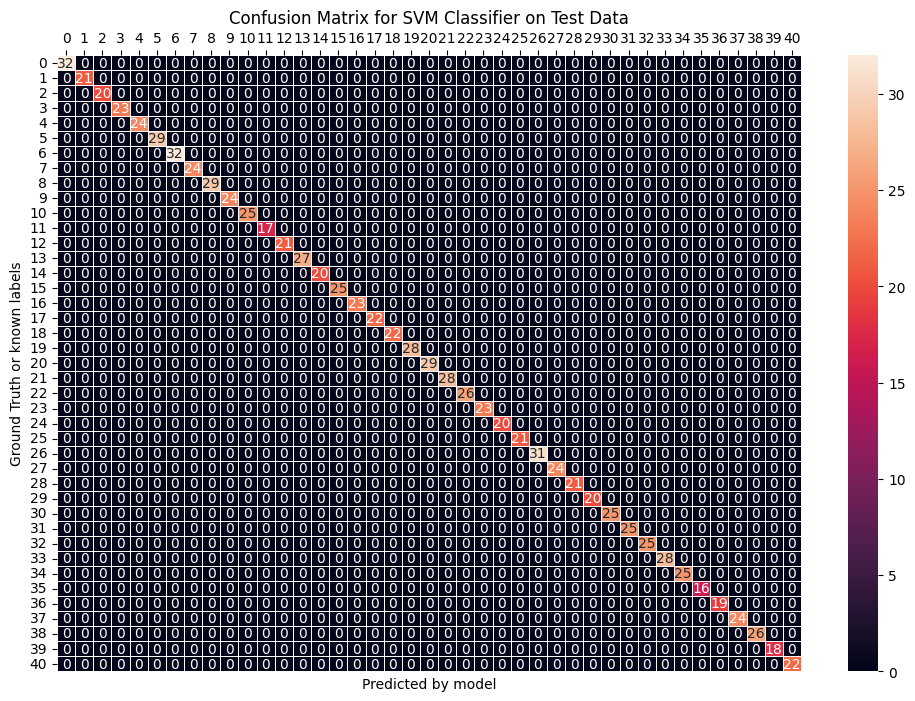

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(data= cf_matrix,
          # rectangular dataset;2D dataset that can be coerced into an ndarray.
            annot= True,
          # If True, write the data value in each cell.
            linewidth=.5
          # Add lines between cells
            )

# ax.xaxis.tick_top()
ax.tick_params(top=True,
               labeltop=True,
               bottom=False,
               labelbottom=False)
ax.set(xlabel="Predicted by model",
       ylabel="Ground Truth or known labels")
# Ground Truth on y-axis
# Predictions on x-axis
# [ref: https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix]
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Compute confusion matrix to evaluate the accuracy of a classification.
By definition a confusion matrix C is such that C(i,j)
is equal to the number of observations known to be in group "i" and predicted to be in group "j".
[ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html ]

# Naive Bayes Classifier

In [ ]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)

print("Accuracy on training data by Naive Bayes Classifier = ",
      accuracy_score(y_train, nb_model.predict(X_train))*100)

print("Accuracy on test data by Naive Bayes Classifier = ",
      accuracy_score(y_test, y_pred)*100)

Accuracy on training data by Naive Bayes Classifier =  100.0
Accuracy on test data by Naive Bayes Classifier =  100.0


In [ ]:
target_class_names = ['class '+ str(i) for i in range(0,41)]
# print(target_names)

In [ ]:
print("Classification Report on training data by Naive Bayes Classifier = \n",
      classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names= target_class_names))

Classification Report on training data by Naive Bayes Classifier = 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        32
     class 1       1.00      1.00      1.00        21
     class 2       1.00      1.00      1.00        20
     class 3       1.00      1.00      1.00        23
     class 4       1.00      1.00      1.00        24
     class 5       1.00      1.00      1.00        29
     class 6       1.00      1.00      1.00        32
     class 7       1.00      1.00      1.00        24
     class 8       1.00      1.00      1.00        29
     class 9       1.00      1.00      1.00        24
    class 10       1.00      1.00      1.00        25
    class 11       1.00      1.00      1.00        17
    class 12       1.00      1.00      1.00        21
    class 13       1.00      1.00      1.00        27
    class 14       1.00      1.00      1.00        20
    class 15       1.00      1.00      1.00        25
    class 16

In [ ]:
cf_matrix = confusion_matrix(y_true= y_test,
                             y_pred= y_pred)
# y_true - Ground truth (correct) target values.
# y_pred - Estimated targets as returned by a classifier.
# [ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html]

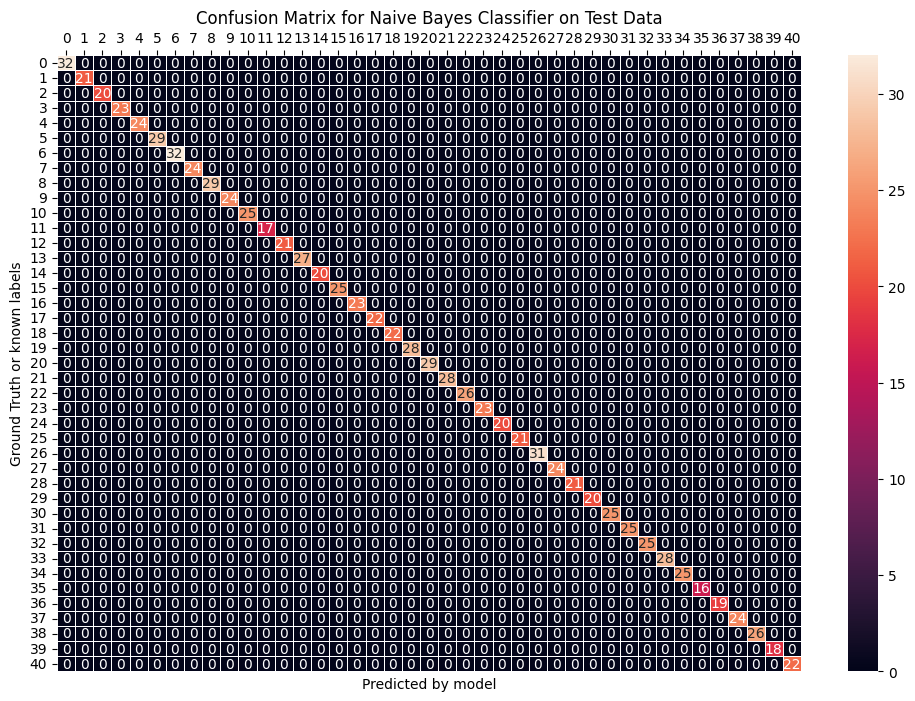

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(data= cf_matrix,
          # rectangular dataset;2D dataset that can be coerced into an ndarray.
            annot= True,
          # If True, write the data value in each cell.
            linewidth=.5
          # Add lines between cells
            )

# ax.xaxis.tick_top()
ax.tick_params(top=True,
               labeltop=True,
               bottom=False,
               labelbottom=False)
ax.set(xlabel="Predicted by model",
       ylabel="Ground Truth or known labels")
# Ground Truth on y-axis
# Predictions on x-axis
# [ref: https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix]
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Random Forest

In [ ]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
# fit model to training data
rf_model.fit(X_train, y_train)
# make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
print("Accuracy on training data by Random Forest Classifier = ",
      accuracy_score(y_train, nb_model.predict(X_train))*100)

print("Accuracy on test data by Random Forest Classifier = ",
      accuracy_score(y_test, y_pred)*100)

Accuracy on training data by Random Forest Classifier =  100.0
Accuracy on test data by Random Forest Classifier =  100.0


In [ ]:
target_class_names = ['class '+ str(i) for i in range(0,41)]
# print(target_names)

In [ ]:
print("Classification Report on training data by Random Forest Classifier = \n",
      classification_report(y_true = y_test,
                            y_pred = y_pred,
                            target_names= target_class_names))

Classification Report on training data by Random Forest Classifier = 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        32
     class 1       1.00      1.00      1.00        21
     class 2       1.00      1.00      1.00        20
     class 3       1.00      1.00      1.00        23
     class 4       1.00      1.00      1.00        24
     class 5       1.00      1.00      1.00        29
     class 6       1.00      1.00      1.00        32
     class 7       1.00      1.00      1.00        24
     class 8       1.00      1.00      1.00        29
     class 9       1.00      1.00      1.00        24
    class 10       1.00      1.00      1.00        25
    class 11       1.00      1.00      1.00        17
    class 12       1.00      1.00      1.00        21
    class 13       1.00      1.00      1.00        27
    class 14       1.00      1.00      1.00        20
    class 15       1.00      1.00      1.00        25
    class 

In [ ]:
cf_matrix = confusion_matrix(y_true= y_test,
                             y_pred= y_pred)
# y_true - Ground truth (correct) target values.
# y_pred - Estimated targets as returned by a classifier.
# [ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html]

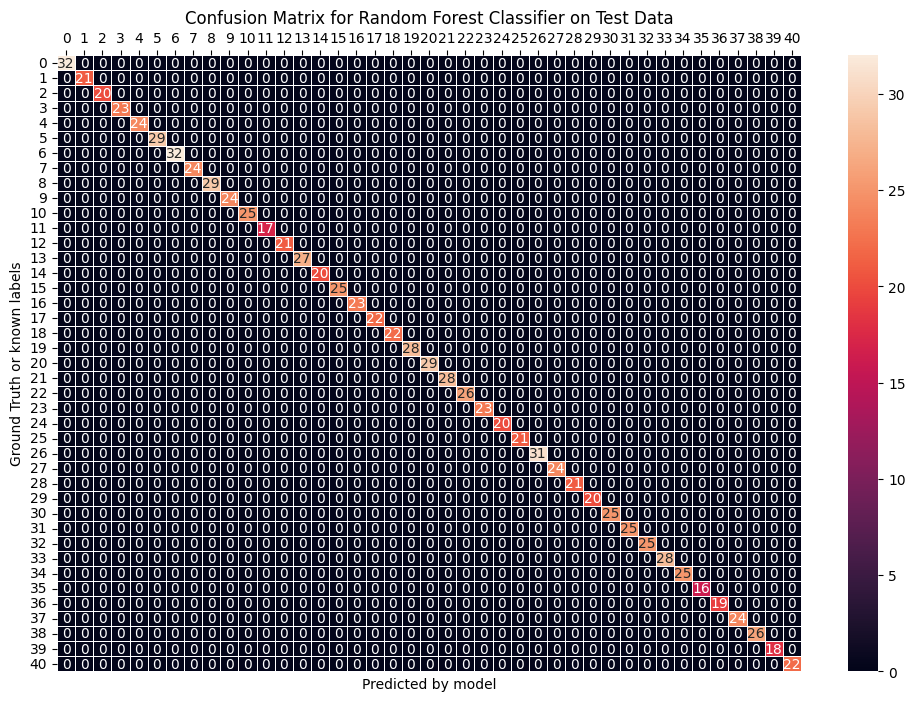

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(data= cf_matrix,
          # rectangular dataset;2D dataset that can be coerced into an ndarray.
            annot= True,
          # If True, write the data value in each cell.
            linewidth=.5
          # Add lines between cells
            )

# ax.xaxis.tick_top()
ax.tick_params(top=True,
               labeltop=True,
               bottom=False,
               labelbottom=False)
ax.set(xlabel="Predicted by model",
       ylabel="Ground Truth or known labels")
# Ground Truth on y-axis
# Predictions on x-axis
# [ref: https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix]
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Based on observing confusion matrix heatmap, classification reports, accuracy score; for all 3 models SVM, NB, RF; we can reasonbl claim models are performing well with the test split from source data i.e. test data.

# Re-train models using all available data

In [ ]:
# Training the models using all available data;
#  that is not splitting into train-test subsets of data
# instantiate models
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
# fit/train the model using all available data
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [ ]:
# Reading the test data
test_data = pd.read_csv(test_data_path).dropna(axis=1)
# drop columns with NaN values

.dropna(axis=1)
- axis=1, ‘columns’ : Drop columns which contain missing value.

[ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas-dataframe-dropna]

In [ ]:
test_X = test_data.iloc[:, :-1]
# first ":" means get all rows.
# second ":-1" means last col only, negative indexing.

In [ ]:
test_Y = encoder.transform(test_data.iloc[:, -1])
# see first few cells for encoder WHY, WHAT

# Taking mode of predictions  
made by all the classifiers
- mode (most frequently occuring value)

In [ ]:
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

In [ ]:
# type(svm_preds)

In [ ]:
list_gen = [(i,j,k) for i,j, k in zip(svm_preds, nb_preds, rf_preds)]
print(list_gen[0:3])
print(mode(list_gen[0:3])[0][0])

[(15, 15, 15), (4, 4, 4), (16, 16, 16)]
4


In [ ]:
final_preds =\
 [mode([i,j,k])[0] for i,j, k in zip(svm_preds, nb_preds, rf_preds)]

In [ ]:
print("Accuracy on unseen general data by combined model = ",
      accuracy_score(test_Y, final_preds)*100)

Accuracy on unseen general data by combined model =  100.0


In [ ]:
cf_matrix = confusion_matrix(y_true= test_Y,
                             y_pred= final_preds)
# y_true - Ground truth (correct) target values.
# y_pred - Estimated targets as returned by a classifier.
# [ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html]

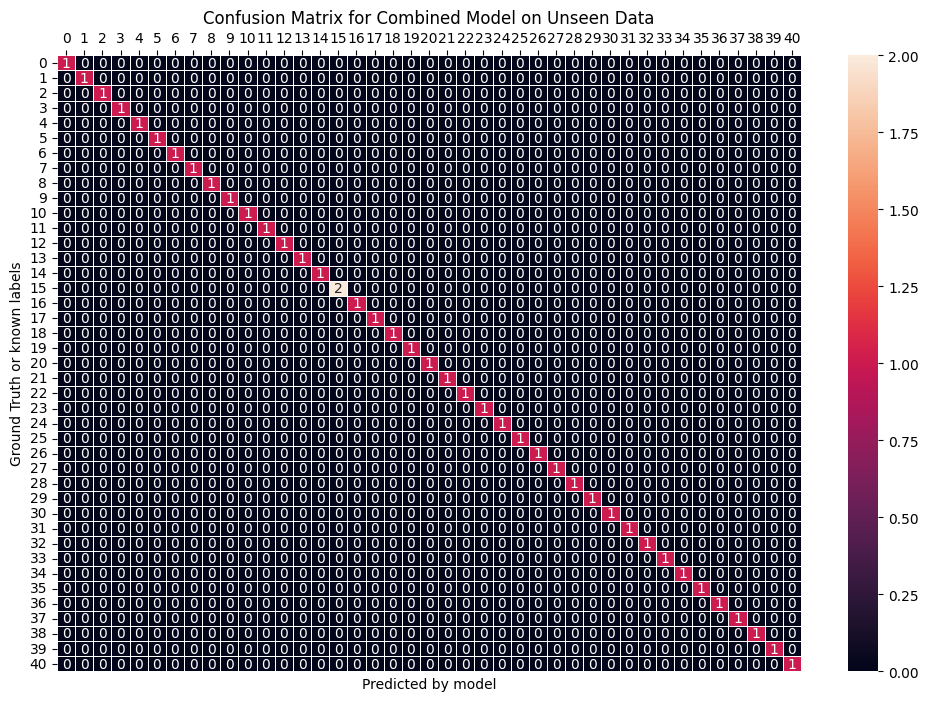

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(data= cf_matrix,
          # rectangular dataset;2D dataset that can be coerced into an ndarray.
            annot= True,
          # If True, write the data value in each cell.
            linewidth=.5
          # Add lines between cells
            )

# ax.xaxis.tick_top()
ax.tick_params(top=True,
               labeltop=True,
               bottom=False,
               labelbottom=False)
ax.set(xlabel="Predicted by model",
       ylabel="Ground Truth or known labels")
# Ground Truth on y-axis
# Predictions on x-axis
# [ref: https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix]
plt.title("Confusion Matrix for Combined Model on Unseen Data")
plt.show()

In [ ]:
target_class_names = ['class '+ str(i) for i in range(0,41)]
# print(target_names)

In [ ]:
print("Classification Report on unseen data by Combined Model = \n",
      classification_report(y_true = test_Y,
                            y_pred = final_preds,
                            target_names= target_class_names))

Classification Report on unseen data by Combined Model = 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         1
     class 1       1.00      1.00      1.00         1
     class 2       1.00      1.00      1.00         1
     class 3       1.00      1.00      1.00         1
     class 4       1.00      1.00      1.00         1
     class 5       1.00      1.00      1.00         1
     class 6       1.00      1.00      1.00         1
     class 7       1.00      1.00      1.00         1
     class 8       1.00      1.00      1.00         1
     class 9       1.00      1.00      1.00         1
    class 10       1.00      1.00      1.00         1
    class 11       1.00      1.00      1.00         1
    class 12       1.00      1.00      1.00         1
    class 13       1.00      1.00      1.00         1
    class 14       1.00      1.00      1.00         1
    class 15       1.00      1.00      1.00         2
    class 16       1.0

# Generalize the Combined Model
Use it to make predictions on user input data
User input data i.e. symptoms should be exactly the same among the 132 symptoms in the dataset.

In [ ]:
symptoms_input = X.columns.values
symptoms_input

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [ ]:
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index_dict = {}
for index_global, symptom_name in enumerate(symptoms_input):
    # symptom = " ".join([i for i in symptom_name.split("_")])
    symptom_index_dict[symptom_name] = index_global

In [ ]:
symptom_index_dict

{'itching': 0,
 'skin_rash': 1,
 'nodal_skin_eruptions': 2,
 'continuous_sneezing': 3,
 'shivering': 4,
 'chills': 5,
 'joint_pain': 6,
 'stomach_pain': 7,
 'acidity': 8,
 'ulcers_on_tongue': 9,
 'muscle_wasting': 10,
 'vomiting': 11,
 'burning_micturition': 12,
 'spotting_ urination': 13,
 'fatigue': 14,
 'weight_gain': 15,
 'anxiety': 16,
 'cold_hands_and_feets': 17,
 'mood_swings': 18,
 'weight_loss': 19,
 'restlessness': 20,
 'lethargy': 21,
 'patches_in_throat': 22,
 'irregular_sugar_level': 23,
 'cough': 24,
 'high_fever': 25,
 'sunken_eyes': 26,
 'breathlessness': 27,
 'sweating': 28,
 'dehydration': 29,
 'indigestion': 30,
 'headache': 31,
 'yellowish_skin': 32,
 'dark_urine': 33,
 'nausea': 34,
 'loss_of_appetite': 35,
 'pain_behind_the_eyes': 36,
 'back_pain': 37,
 'constipation': 38,
 'abdominal_pain': 39,
 'diarrhoea': 40,
 'mild_fever': 41,
 'yellow_urine': 42,
 'yellowing_of_eyes': 43,
 'acute_liver_failure': 44,
 'fluid_overload': 45,
 'swelling_of_stomach': 46,
 'swelle

In [ ]:
predicted_disease_labels = encoder.classes_
predicted_disease_labels

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [ ]:
# Creating a disease index dictionary to encode the
# output disease labesl into numerical form
disease_label_index_dict = {}
for index_global, disease_name in enumerate(predicted_disease_labels):
    # symptom = " ".join([i for i in symptom_name.split("_")])
    disease_label_index_dict[disease_name] = index_global

In [ ]:
disease_label_index_dict

{'(vertigo) Paroymsal  Positional Vertigo': 0,
 'AIDS': 1,
 'Acne': 2,
 'Alcoholic hepatitis': 3,
 'Allergy': 4,
 'Arthritis': 5,
 'Bronchial Asthma': 6,
 'Cervical spondylosis': 7,
 'Chicken pox': 8,
 'Chronic cholestasis': 9,
 'Common Cold': 10,
 'Dengue': 11,
 'Diabetes ': 12,
 'Dimorphic hemmorhoids(piles)': 13,
 'Drug Reaction': 14,
 'Fungal infection': 15,
 'GERD': 16,
 'Gastroenteritis': 17,
 'Heart attack': 18,
 'Hepatitis B': 19,
 'Hepatitis C': 20,
 'Hepatitis D': 21,
 'Hepatitis E': 22,
 'Hypertension ': 23,
 'Hyperthyroidism': 24,
 'Hypoglycemia': 25,
 'Hypothyroidism': 26,
 'Impetigo': 27,
 'Jaundice': 28,
 'Malaria': 29,
 'Migraine': 30,
 'Osteoarthristis': 31,
 'Paralysis (brain hemorrhage)': 32,
 'Peptic ulcer diseae': 33,
 'Pneumonia': 34,
 'Psoriasis': 35,
 'Tuberculosis': 36,
 'Typhoid': 37,
 'Urinary tract infection': 38,
 'Varicose veins': 39,
 'hepatitis A': 40}

In [ ]:
data_dict = {
    "symptom_index":symptom_index_dict, # input or predicTOR vars
    "predictions_classes":disease_label_index_dict  # target or preditcTED var
}

In [ ]:
data_dict

{'symptom_index': {'itching': 0,
  'skin_rash': 1,
  'nodal_skin_eruptions': 2,
  'continuous_sneezing': 3,
  'shivering': 4,
  'chills': 5,
  'joint_pain': 6,
  'stomach_pain': 7,
  'acidity': 8,
  'ulcers_on_tongue': 9,
  'muscle_wasting': 10,
  'vomiting': 11,
  'burning_micturition': 12,
  'spotting_ urination': 13,
  'fatigue': 14,
  'weight_gain': 15,
  'anxiety': 16,
  'cold_hands_and_feets': 17,
  'mood_swings': 18,
  'weight_loss': 19,
  'restlessness': 20,
  'lethargy': 21,
  'patches_in_throat': 22,
  'irregular_sugar_level': 23,
  'cough': 24,
  'high_fever': 25,
  'sunken_eyes': 26,
  'breathlessness': 27,
  'sweating': 28,
  'dehydration': 29,
  'indigestion': 30,
  'headache': 31,
  'yellowish_skin': 32,
  'dark_urine': 33,
  'nausea': 34,
  'loss_of_appetite': 35,
  'pain_behind_the_eyes': 36,
  'back_pain': 37,
  'constipation': 38,
  'abdominal_pain': 39,
  'diarrhoea': 40,
  'mild_fever': 41,
  'yellow_urine': 42,
  'yellowing_of_eyes': 43,
  'acute_liver_failure': 4

In [ ]:
data_dict["predictions_classes"]

{'(vertigo) Paroymsal  Positional Vertigo': 0,
 'AIDS': 1,
 'Acne': 2,
 'Alcoholic hepatitis': 3,
 'Allergy': 4,
 'Arthritis': 5,
 'Bronchial Asthma': 6,
 'Cervical spondylosis': 7,
 'Chicken pox': 8,
 'Chronic cholestasis': 9,
 'Common Cold': 10,
 'Dengue': 11,
 'Diabetes ': 12,
 'Dimorphic hemmorhoids(piles)': 13,
 'Drug Reaction': 14,
 'Fungal infection': 15,
 'GERD': 16,
 'Gastroenteritis': 17,
 'Heart attack': 18,
 'Hepatitis B': 19,
 'Hepatitis C': 20,
 'Hepatitis D': 21,
 'Hepatitis E': 22,
 'Hypertension ': 23,
 'Hyperthyroidism': 24,
 'Hypoglycemia': 25,
 'Hypothyroidism': 26,
 'Impetigo': 27,
 'Jaundice': 28,
 'Malaria': 29,
 'Migraine': 30,
 'Osteoarthristis': 31,
 'Paralysis (brain hemorrhage)': 32,
 'Peptic ulcer diseae': 33,
 'Pneumonia': 34,
 'Psoriasis': 35,
 'Tuberculosis': 36,
 'Typhoid': 37,
 'Urinary tract infection': 38,
 'Varicose veins': 39,
 'hepatitis A': 40}

In [ ]:
# len(symptom_index_dict) # input or predicTOR vars

In [ ]:
# len(encoder.classes_)
# target or preditcTED var;
# multi-class; len gives qty. of classess or labels in target var

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Create function that produces output (diesease label/class)
# given certain inputs (symptoms)
# Input: string type, CSV (comma separated values)
# Output: string type, diesease label/class
def predict_disease_label(symptoms_csv_input):
    symptoms = symptoms_csv_input
    print("symptoms= \n", symptoms)

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    # print("input_data= \n", input_data)

    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        # extract number (index) corresponding to symptom_name
        input_data[index] = 1

    # print("\n input_data= \n", input_data)
    # print("\n before reshape, input_data= \n", type(input_data))

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    # print("\n after reshape, input_data= \n", input_data)
    # print("\n after reshape, input_data= \n", input_data.shape)
    # print(type(input_data), "\n")
    # print("input_data[0]= \n", input_data[0])

    def method1(dict2, final_prediction_idx):
      for k, v in dict2.items():
          if v == final_prediction_idx:
              return k

    # generating individual outputs
    rf_prediction = final_rf_model.predict(input_data)[0]
    nb_prediction = final_nb_model.predict(input_data)[0]
    svm_prediction = final_svm_model.predict(input_data)[0]
    # print("rf_prediction= \n", rf_prediction)
    # print("nb_prediction= \n", nb_prediction)
    # print("svm_prediction= \n", svm_prediction)

    # # combining individual outputs into a list
    # rf_prediction =\
    #  data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    # nb_prediction =\
    #  data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    # svm_prediction =\
    #  data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # collect all predictions
    prediction_labels = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        # "final_prediction":final_prediction
    }
    # print("\n prediction_labels= \n", prediction_labels)

    # Get indices of predictions instead of labels
    rf_prediction_idx = final_rf_model.predict(input_data)[0]
    nb_prediction_idx = final_nb_model.predict(input_data)[0]
    svm_prediction_idx = final_svm_model.predict(input_data)[0]
    # collect each prediction index
    # prediction_idx = {
    #     "rf_prediction_idx": rf_prediction_idx,
    #     "nb_prediction_idx": nb_prediction_idx,
    #     "svm_prediction_idx": svm_prediction_idx,
    #     # "final_prediction":final_prediction
    # }
    # print("\n prediction_idx= \n", prediction_idx)

    # Take mode of all individual predictions
    final_prediction_idx = mode([rf_prediction_idx,
                             nb_prediction_idx,
                             svm_prediction_idx])[0]
    # print("\n final_prediction_idx= \n", final_prediction_idx)
    # print("\n type final_prediction_idx= \n", type(final_prediction_idx))

    # print("\n final_prediction_idx= \n", final_prediction_idx)
    # final_prediction_label =\
    #  data_dict["predictions_classes"][final_prediction_idx]

    dict2 = data_dict["predictions_classes"]
    # print("\n dict2= \n", dict2)
    # print("\n dict2.keys()= \n", dict2.keys())

    final_prediction_label= method1(dict2, final_prediction_idx)
    # print("\n final_prediction_label= \n", ans)

    return final_prediction_label
    # predictions


In [ ]:
input_1 = ('itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing',
           'shivering', 'chills', 'joint_pain')
# input_2
input_2 = ('acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision')

In [ ]:
# call function
print("\n Prognosis= ", predict_disease_label(input_1),"\n\n")
print("\n Prognosis= ", predict_disease_label(input_2),"\n\n")

symptoms= 
 ('itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain')

 Prognosis=  Fungal infection 


symptoms= 
 ('acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision')

 Prognosis=  Alcoholic hepatitis 


